# 單與多品牌聲量（電影）

In [1]:
import pandas as pd

## 資料讀取

匯入原始爬蟲資料

In [2]:
KoreaDrama = pd.read_csv("assets/KoreaDrama_re.csv")

將重複與空白訊息去除

In [3]:
KoreaDrama.drop_duplicates()
KoreaDrama.dropna(inplace=True)

資料欄位整合，所有文字變成一個大字串

In [4]:
KoreaDrama["所有文"] = KoreaDrama["標題"] + KoreaDrama["內容"]
theSTR = str(KoreaDrama["所有文"].sum())

## 資料清理，無意義字元去除

In [5]:
import functools
import json


with open("assets/remove_words.json", "r") as f:
    removeword = json.load(f)

theSTR = functools.reduce(lambda x, y: x.replace(y, ""), removeword, theSTR)
theSTR

"LIVE2018SBS演技大賞2018SBS演技大賞日期20181231時間2055主持人申東燁申惠善李帝勳網頁a5izEtoblank5izEtoa感謝watase124提供直播資訊＊ahttpenjoybscomlivechannelSBSblankhttpenjoybscomlivechannelSBSa點MoredetailLIVE2018KBS演技大賞2018KBS演技大賞直播201812311955直播網址1ahttpenjoybscomlivechannelKBS2blankhttpenjoybscomlivechannelKBS2aMoredetail→Playcontent直播網址2ayoutubeJNWDvosPBWYblankyoutubeJNWDvosPBWYa主持人全炫茂Uie現在正在快速撥出紅毯畫面中一部得獎名單男子青少年演技獎南多凜RadioRomance女子青少年演技獎金煥熙我們遇見的奇蹟男子新人獎朴成勳我唯一的守護者男子新人獎金權一起生活吧女子新人獎朴世婉一起生活吧女子新人獎薛仁雅明日也晴朗男子配角獎金元海今天的偵探你也是人類嗎男子配角獎印喬鎮就算死也喜歡女子配角獎金賢淑推理的女王2你也是人類嗎女子配角獎尹真伊我唯一的守護者男子聯作獨幕劇獎張東尹國標舞女孩男子聯作獨幕劇獎尹博金槍魚與海豚女子聯作獨幕劇獎李一花媽媽的第三次婚姻女子聯作獨幕劇獎李雪玉蘭麵屋男子優秀獎日日劇部門姜恩卓愛到最後男子優秀獎日日劇部門朴胤載讓開命運啊女子優秀獎日日劇部門夏希羅車達萊夫人的愛情女子優秀獎日日劇部門朴荷娜人偶之家男子優秀獎長篇電視劇部門李尚禹一起生活吧男子優秀獎長篇電視劇部門李章宇我唯一的守護者女子優秀獎長篇電視劇部門韓智慧一起生活吧女子優秀獎長篇電視劇部門Uie我唯一的守護者網路票選人氣賞金明民我們遇見的奇蹟網路票選人氣賞朴炯植金牌律師二部得獎名單作家賞金思京我唯一的守護者最佳CP獎徐康俊孔昇延你也是人類嗎最佳CP獎崔丹尼爾白珍熙Jugglers最佳CP獎金明民羅美蘭我們遇見的奇蹟最佳CP獎車太鉉裴斗娜最完美的離婚最佳CP獎劉東根張美姬一起生活吧最佳CP獎李章宇Uie我唯一的守護者最佳CP獎崔秀宗陳慶我唯一的守護者GirlCrushBest3張美姬一起生活吧GirlCrushBest3陳慶我唯一的守護者GirlCrushBest3Uie我唯一的守

## Jieba 將字串斷詞，變成 list

In [6]:
import jieba

jieba.set_dictionary("assets/dict.txt.big")
jieba.load_userdict("assets/movie_dict.txt")

words = jieba.lcut(theSTR, cut_all=False)

Building prefix dict from /Volumes/Dev/nkust/nkust-homework/semester-6/marketing/02-share-of-voice/assets/dict.txt.big ...
Loading model from cache /var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/jieba.u6e9054f30d8bff41ff092210c9dc3fac.cache
Loading model cost 0.164 seconds.
Prefix dict has been built successfully.


## 單品牌聲量計算

品牌在 jieba 斷詞字串出現的次數。

In [7]:
singlemovie = "皮諾丘"
singlemovievoice = words.count(singlemovie)

## 顯示品牌聲量繪圖

In [8]:
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]

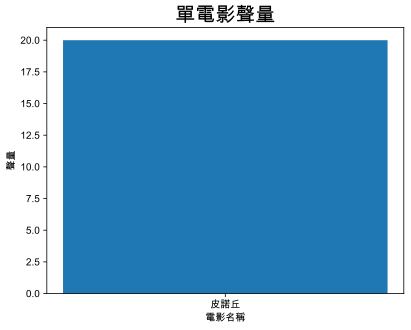

In [9]:
plt.bar(singlemovie, singlemovievoice)
plt.xlabel("電影名稱")
plt.ylabel("聲量")
plt.title("單電影聲量", fontsize=20)
plt.show()


## 多品牌聲量計算

1. 請用一張圖畫出下列10部電影的聲量圖
2. 並在圖中以虛線畫出所有聲量平均線
3. 將各電影聲量圖存檔為 `movie_voice_df.csv`

In [10]:
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]

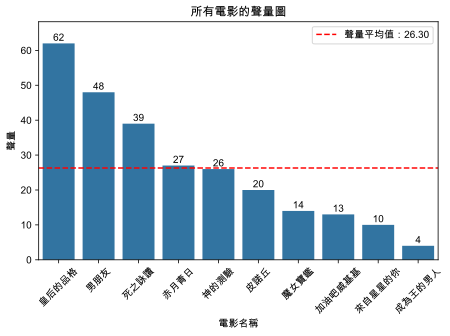

In [ ]:
movies = [
    "成為王的男人",
    "皇后的品格",
    "赤月青日",
    "神的測驗",
    "死之詠讚",
    "加油吧威基基",
    "皮諾丘",
    "魔女寶鑑",
    "男朋友",
    "來自星星的你",
]

count = [{"name": movie, "count": words.count(movie)} for movie in movies]
count_df = pd.DataFrame(count)
count_df.sort_values(by="count", ascending=False, inplace=True)

plt.margins(y=0.1)

# 所有電影的聲量圖
sns.barplot(x="name", y="count", data=count_df)

# 值標籤
for index, row in count_df.iterrows():
    plt.text(x=row["name"], y=row["count"]+0.2, s=row["count"], ha="center", va="bottom")

# label 要轉 45 度角
plt.xticks(rotation=45)

# 聲量平均線
count_mean = count_df["count"].mean()
plt.axhline(y=count_mean, color="red", linestyle="--", label=f"聲量平均值：{count_mean:.2f}")

plt.xlabel("電影名稱")
plt.ylabel("聲量")
plt.title("所有電影的聲量圖")
plt.legend()

plt.tight_layout()
plt.show()

儲存聲量圖

In [12]:
import os


os.makedirs("dist", exist_ok=True)
count_df.to_csv("dist/movie_voice_df.csv", index=False)